**Intructions**

In this problem set, we'll be learning the basics of Numpy, Scipy, and Matplotlib. This coding assignment is split up into tree parts: a short "warm-up" exercises, medium coding exercises, and an application to economics.

A blank code or markup cell will be left after each exercise for you to fill in with your solution.

I've completed the first few exercises for you to show you how you should format your HW submission.

In [ ]:
# Run the cell below to add section numbering

In [1]:
%%HTML
<style>
body {
  counter-reset: section subsection;
}

h1 {
  counter-reset: subsection;
}

h1:before {
    counter-increment: section;
    content: "" counter(section) ". ";
}

h2:before {
    counter-increment: subsection;
    content: counter(section) "." counter(subsection) " ";
}
</style>

# Warmup

## Import Necessary Modules

You should always start you file with all of the `import` statements that you will be using for the file. This makes it easier to quickly check what modules each file depends on---all you have to do is look at the top of the file. 

For this problem, import numpy, scipy, and the pyplot submodule from matplotlib.

In [131]:
# Completed for you

import numpy as np
import pandas as pd
import scipy
import scipy.integrate
import scipy.stats
from scipy import misc
from scipy.optimize import minimize
from matplotlib import pyplot as plt

## Use built-in Numpy functions to do the following tasks

1. Create a vector (numpy array) of size 10 that contains all zeros and print it. (Use np.zeros.)
2. Use `arange` to create a vector of values from 5 to 24. Print it.
3. Use `arange` and Python "slicing" to create a vector of values from 24, to 5. Print it.
4. Use `arange` and Python "slicing" to create a vector consisting of all the even integers in the half-open interval $[0,30)$.
5. Use `arange` and `reshape` to create a 3x3 numpy array containing the numbers 0 to 8.

In [6]:
# Completed for you

# 1
print("1.")
Z = np.zeros(10)
print(Z)

# 2
print("2.")
print(np.arange(5,25))

# 3
print("3.")
z = np.arange(5, 25)
print(z[::-1])

# 4
print("4.")
z = np.arange(0,30)
print(z[::2])

# 5
print("5.")
print(np.arange(0,9).reshape((3,3)))

1.
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2.
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
3.
[24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5]
4.
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]
5.
[[0 1 2]
 [3 4 5]
 [6 7 8]]


## Numpy functions continued... (2 points each)

1. Use `eye` to create a 5x5 identity matrix. Print it.
2. Use `random.random` to generate a 3x3x3 array of numbers randomly generated from a uniform distribution over the support interval $[0,1)$. Print it.
3. Create a 10x10 array with similarly generated random values. Find and print the minimum and maximum values appearing in the matrix using `min` and `max`.
4. Create a random vector of size 30. Find and print the mean value.
5. Use `zeros` and/or `ones` and slicing to create a 10x10 array with 1's on the border and 0's inside.

In [41]:
# TODO
print("1.")
I = np.eye(5)
print(I)

print("2.")
print(np.random.random((3,3,3)))

print("3.")
mat = np.random.random((10,10))
matmin = mat.min()
matmax = mat.max()
print(matmin, matmax)

print("4.")
q = np.random.random((30))
print(q.mean())

print("5.")
r = np.ones((10,10))
r[1:-1,1:-1] = 0
print(r)

1.
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
2.
[[[ 0.44346686  0.32221719  0.63117416]
  [ 0.78700569  0.88933619  0.68378093]
  [ 0.34607897  0.86340439  0.99477158]]

 [[ 0.6664106   0.59382204  0.10273868]
  [ 0.32798812  0.29114985  0.81655304]
  [ 0.51807859  0.84819738  0.66726384]]

 [[ 0.70275813  0.12180099  0.05651757]
  [ 0.99867244  0.21080419  0.77093451]
  [ 0.54032964  0.41616826  0.94223949]]]
3.
0.0168669648167 0.999748491309
4.
0.457384015086
5.
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


## Integration with Scipy (2 points)

 - (1) The PDF of a Normal distibution is 
 $$
f(x; \mu, \sigma) =  \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{- \frac{(x - \mu)^2}{2 \sigma^2}\right\}
 $$
 
 Let $\mu = 1$ and $\sigma = 2$. Use Scipy to numerical integrate this function. Specifically, calculate
 $$
 \int_{-2}^{2} f(x; \mu, \sigma) \mathrm d x
 $$
 
 Verify your result using the built-in function for the CDF of a normal distribution: `scipy.stats.norm.cdf(x, loc=mu, scale=sigma)`. To calculate the proper area as the integral above, you will need to compute
 $$
 F(2) - F(-2),
 $$
 where $F$ is the CDF of the normal with mean 1 and standard deviation 2.
 
 (Hint: You will need to import `scipy.integrate` and `scipy.stats` to access the functions that you need.)

In [198]:
# TODO
from scipy.integrate import quad
import scipy.integrate
x2 = lambda x: (1/sqrt(8*(np.pi)))*(np.exp(-((x-1)**2)/8))
scipy.integrate(x2, -2, 2)

scipy.stats.norm.cdf(x, loc=mu, scale = sigma)
mu =1
sigma =2



# Medium Exercises

## Array Indexing with an Image (4 points)

Run the code in the cell below to access a matrix called `face`. Print the matrix to get an idea of what it looks like. What is its dimensions?

In [46]:
from scipy import misc
face = misc.face(gray=True).astype('float64')

[[ 114.  130.  145. ...,  119.  129.  137.]
 [  83.  104.  123. ...,  118.  134.  146.]
 [  68.   88.  109. ...,  119.  134.  145.]
 ..., 
 [  98.  103.  116. ...,  144.  143.  143.]
 [  94.  104.  120. ...,  143.  142.  142.]
 [  94.  106.  119. ...,  142.  141.  140.]]


 ...]

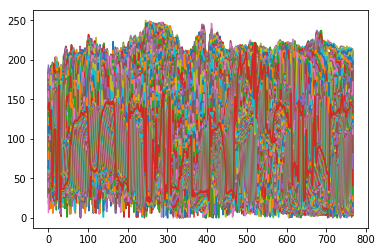

In [63]:
# TODO
print(face)
np.shape(face)
plt.plot(face)

Now, apply the function `np.sin(x/25)` to the face matrix and then plot it again. This doesn't do anything very deep, it just messes with the shades of gray in a nonlinear way.

 ...]

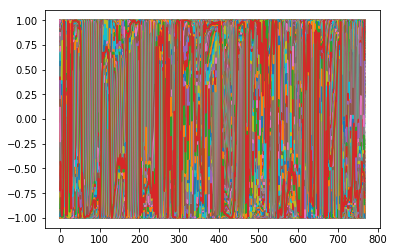

In [62]:
# TODO
from matplotlib  import pyplot as plt 
%matplotlib inline
x = np.sin(face/25)
plt.plot(x)

Imagine a circle with a center at the matrix indices (300, 620) and a radius of 250. In the x-y plane, this would be 620, 300. Write a snippet of code that, for each pixel, calculates the distance of that pixel from the center of this circle. If the distance is greater than the radius of the circle, set the value of the pixel (the element of the matrix) equal to zero. Plot the result, again using `plt.ishow` with a gray colormap.

Be sure to create a new copy of the `face` matrix, `face2`. Create a proper copy using the `copy` method of the `np.array` class.

In [ ]:
# TODO: Finish the following code.

face2 = face.copy()
cx, cy = 620, 300
radius = 250
for i in range(face.shape[0]):
    for j in range(face.shape[1]):        
        # TODO: Your code here
        pass
        
plt.imshow(face2, cmap=plt.cm.gray)

## Compressing an Image with Linear Algebra (2 points for each part)

Here we'll play with the Singular Value Decomposition (SVD) function in Numpy's `linalg` submodule. You can think of the SVD as a generalization of the eigenvalue decomposition for non-square matrices.

Here we will be using the same `face` matrix as above.

 - (1) To begin, calculate the SVD using the code. (For this part, you can just copy and paste this code.)
 
     `u, s, v = np.linalg.svd(face, full_matrices=False)`

In [68]:
# TODO
u, s, v = np.linalg.svd(face, full_matrices=False)

 - (2) Calculate the shape of `u`, `s`, and `v`.

In [69]:
u.shape
s.shape
v.shape


(768, 1024)

 - (3) Construct a matrix by matrix multiplying `u`, `s`, and `v`. Note that `s` doesn't conform as it stands. Mathematically, we want to compute 
$$
U \cdot \text{diag}(S) \cdot V.
$$
Thus, we need $\text{diag}(S)$ to be a 768 x 768 matrix with the values of `s` on the diagonal. These are the singular values---analogous to the eigenvalues---of the `face` matrix. Use `np.diag` to do this. Use `@` to perform the matrix multplication. Call this new matrix `faceUSV`.

In [74]:
# TODO
faceUSV = u @ np.diag(s) @ v
faceUSV

array([[ 114.,  130.,  145., ...,  119.,  129.,  137.],
       [  83.,  104.,  123., ...,  118.,  134.,  146.],
       [  68.,   88.,  109., ...,  119.,  134.,  145.],
       ..., 
       [  98.,  103.,  116., ...,  144.,  143.,  143.],
       [  94.,  104.,  120., ...,  143.,  142.,  142.],
       [  94.,  106.,  119., ...,  142.,  141.,  140.]])

 - (4) Use the function `np.allclose` to test if all of the elements of the matrices `faceUSV` and `face` are numerically close. Does this verify that our reconstruction was successful? Why are we using `np.allclose` instead of, say, `faceUSV == face` to test if the matrices are the same?

In [75]:
# TODO
np.allclose(faceUSV, face)
#We're using allclose because == will not account for small difference that are essentially negligible.

True

In [100]:
a = np.random.random((3,3))
print(a)
a[:,:2]
np.diag(s[0:2])

[[ 0.25234233  0.71672791  0.63186358]
 [ 0.88218745  0.73292799  0.19346001]
 [ 0.13741072  0.76000486  0.23335508]]


array([[ 103201.72382288,       0.        ],
       [      0.        ,   21610.24029162]])

 - (5) Now, construct a function called `compress` that takes in a number `n` and returns a matrix constructed as follows:
 
$$
U_n \cdot \text{diag}(S_n) \cdot V_n
$$
where $U_n$ is only the first `n` columns of the matrix `u`, $\text{diag}(S_n)$ is the first `n` singular values put on the diagonals of a matrix of zeros (hint: `np.diag(s[0:n])`), and $V_n$ is the first `n` rows of the matrix `v`.

In [103]:
# TODO
def compress(n):
    q = u[:,:n]
    t = v[:n,:]
    return q @ np.diag(s[0:n]) @ t

 - (6) Use your newly created `compress` function to create the a matrix called `face_compressed` for various values of `n`. Plot the matrix using `plt.imshow(face_compressed, cmap=plt.cm.gray)`. Do this for `n in [500, 300, 100, 50, 10]`. What do you see happening?

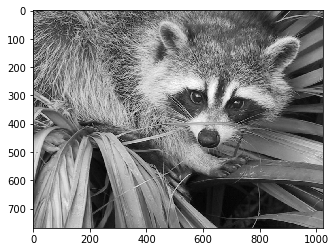

In [111]:
# TODO
face_compressed = compress(500)
plt.imshow(face_compressed, cmap=plt.cm.gray)

face_compressed = compress(300)
plt.imshow(face_compressed, cmap=plt.cm.gray)

face_compressed = compress(100)
plt.imshow(face_compressed, cmap=plt.cm.gray)

face_compressed = compress(50)
plt.imshow(face_compressed, cmap=plt.cm.gray)

face_compressed = compress(10)
plt.imshow(face_compressed, cmap=plt.cm.gray)
#The image of the racoon becomes less and less clearer with a lower number for n.

 - (7). Again use the `size` method to calculate the number of "pixels" (elements in the array) that are in the original `face` matrix. Now, suppose we use the SVD to store this image. Write a function called `storage_size` that computes that number of elements in $U_r$, the number of elements in $V_r$, adds them together, and then adds $n$ for the number of singular values of the $S_r$ vector used. That is
 
 $$
 storageSize = numberOfElements(U_n) + numberOfElements(V_n) + numberOfElements(S_n)
 $$

In [118]:
# TODO
def storage_size(n):
    w = len(u)
    p = len(v)
    return w + p + len(np.diag(s[0:n]))
    

 - (8) Compute the storage size for each of the values of `n` that we tested above. Compared to the original size, `face.size`,
 how much space are we saving (in percentages) when we use `n=100` (which looks almost lossless)?

In [121]:
# TODO
x = storage_size(100)
y = face.size

y-x

#We're saving 784796 pixels of space

784796

**NOTE:** Essentially, we are reconstructing the matrix (and image) using the first `n` singular values. Equivalently, we could say that we are using Principal Component Analysis and reconstructing the image using the first `n` principal components. If this were a square matrix, we could say that we are using the first `n` eigenvalues and eigenvectors.

We will later see that this same technique can be used to analyze complex data. Imagine, for example, applying this procedure to a matrix of data or to the variance-covariance matrix of a set of variables. We will later see that, in the same way that we are compressing and summarizing a complex image, we can summarize the joint distribution of a set of variables.

## Fitting a Curve to Data (2 points for each part)

In this exercise, you will fit a nonlinear curve to data by minimizing the sum of squares. Below, I have given data and a function to plot the data and a curve over the data. The curve is the following function:
$$
y(t) = x_0 \exp(-x_2 t) + x_1 \exp(-x_3 t).
$$

In [122]:
from scipy.optimize import minimize
data = np.array(
  [[0.0000, 5.8955], 
   [0.1000, 3.5639],
   [0.2000, 2.5173],
   [0.3000, 1.9790],
   [0.4000, 1.8990],
   [0.5000, 1.3938],
   [0.6000, 1.1359],
   [0.7000, 1.0096],
   [0.8000, 1.0343],
   [0.9000, 0.8435],
   [1.0000, 0.6856],
   [1.1000, 0.6100],
   [1.2000, 0.5392],
   [1.3000, 0.3946],
   [1.4000, 0.3903],
   [1.5000, 0.5474],
   [1.6000, 0.3459],
   [1.7000, 0.1370],
   [1.8000, 0.2211],
   [1.9000, 0.1704],
   [2.0000, 0.2636]])

def plot_against_data(x):
    tgrid = data[:,0]
    ydata = data[:,1]
    yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
    y = yfunc(tgrid)
    plt.plot(tgrid, ydata, '.')
    plt.plot(tgrid, y)
    
x_initial = np.array([1, 1, 1, 0])

 - (1): Use the given plotting function to plot the data and the curve for the given initial guess of the parameters, `x_initial`.

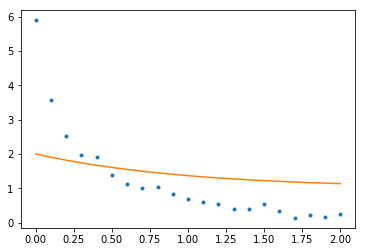

In [123]:
# TODO
plot_against_data(x_initial)

 - (2) Write a function called `sum_squares` that takes in a vector of model paraters (e.g., `x_initial`) and returns the sum of squares that results from the difference of the data and the curve defined by `x_initial`. What is the sum of squares that results from the given `x_initial`?

In [142]:
# TODO
def sum_squares(n):
    psum = 0
    for x in range(1,n+1):
        psum += x*x
    return psum

sum_squares(x_initial)

TypeError: only integer scalar arrays can be converted to a scalar index

 - (3) Use `scipy.optimize.minimize` to minimize the sum of squares, using the function that you wrote previously. Save the optimal parameters to the variable `xstar`.

In [138]:
# TODO
import scipy.stats
from scipy import misc
import scipy.optimize as opt
from scipy.optimize import minimize
xstar = scipy.optmize.minimize(sum_squares(x_initial))

AttributeError: module 'scipy' has no attribute 'optmize'

 - (4) Use the `plot_against_data` function that was given to plot the optimal curve, defined by `xstar`, against the data.

In [139]:
# TODO
plot_against_data(xstar)

NameError: name 'xstar' is not defined

# Application: Mean-Variance Efficient Portfolios (4 points for each part)

In this application, we replicate the Markowitz model of portfolio optimization. This model is a model of investor behavior. It models an investor you prefers a portfolio that has higher expected returns and lower variance, *ceteris paribus*. The result of this assumption is that investors (1) choose diversified portfolios and (2) that there exist on a "mean-variance efficient frontier" along which investors choose their portfolios. That is, there are some portfolios that consist of some combinations of assets that are strictly dominated by other combinations of assets. This model  formalizes the notion that an investor should not "put all of his/her eggs in one basket" as well as  the tradeoff between risk and return.

(Note: There are other important lessons that we can learn from this model, but they are beyond the scope of this class. For one, you may search Google for the concept of the "two-portfolio separation theorem." Also note that we are excluding any "risk-free" short-term assets from our analysis here. Also note that Markowitz won the Nobel prize in economics in 1990 for this analysis.)

Suppose that $\mu$ is a column vector of the means of each asset and suppose that $\Sigma$ is the associated variance-covariance matrix. Now, suppose that we create a column vector of weights $w$ that tells us the fraction of our wealth that we invest in each asset. Then, the formulas in matrix notation for the mean and variance of the resulting portfolio are
$$
\mu_p = \mu' w
$$
and
$$
\sigma_p^2 = w' \Sigma w
$$
respectively.

In this folder, there should be a file called `dataAssets.csv`. Make sure that you have this file. Run the code below to load the data into numpy arrays.

In the matrix of prices, each row corresponds to a day. The columns correspond, (in order,) to the S&P 500 index, USD index, crude oil index, HYG index, and U.S. 10-yr Treasury index. Here I have converted prices to returns for you.

In [140]:
data_assets = pd.read_csv('./dataAssets.csv', parse_dates=['date'])
prices = data_assets.iloc[:,1:].values
dates = data_assets.iloc[:,0].values
rets = (prices[1:,:]/prices[:-1,:] - 1) * 100

In [141]:
np.set_printoptions(precision=3, suppress=True)
data_assets.head()

,date,sp500,USD_index,crude_oil,HYG,treasury_10yr
0,2013-08-07,1690.91,81.287,87.83,91.36,2.5986
1,2013-08-08,1697.48,80.977,87.50,91.56,2.5892
2,2013-08-09,1691.42,81.126,87.95,91.57,2.5784
3,2013-08-12,1689.47,81.333,88.19,91.49,2.6206
4,2013-08-14,1685.39,81.711,88.47,91.31,2.7136


 - (1) Compute the means of the assets and the variance-covariance matrix. Save the means as the numpy array `mu`. Save the variance-covariance matrix as the numpy array `Sigma`.
 

In [154]:
# TODO
sp500 = prices[:,0]
oil = prices[:,1]
bonds = prices[:,2]
mu = prices.mean()
Sigma = np.cov(prices)


,date,sp500,USD_index,crude_oil,HYG,treasury_10yr
1,2013-08-08,1697.48,80.977,87.50,91.56,2.5892
2,2013-08-09,1691.42,81.126,87.95,91.57,2.5784
3,2013-08-12,1689.47,81.333,88.19,91.49,2.6206
4,2013-08-14,1685.39,81.711,88.47,91.31,2.7136
5,2013-08-15,1661.32,81.181,88.42,90.84,2.7664
6,2013-08-16,1655.83,81.257,88.31,90.53,2.8251
7,2013-08-19,1646.06,81.226,88.26,89.93,2.8804
8,2013-08-20,1652.35,80.906,88.40,90.76,2.8142
9,2013-08-21,1642.80,81.213,88.05,90.43,2.8935
10,2013-08-22,1656.96,81.488,88.02,90.92,2.8844


 - (2) For practice, create a vector of portfolio weights that puts equal weight on each of the five assets. Compute the mean and the variance of this portfolio.

In [162]:
# TODO
rets_port = .2 * rets[:,0]+.2 * rets[:,1] + .2 * rets[:,2] + .2 * rets[:,3]+ .2 * rets[:,4]
rets_port
rets_port.mean()
rets_port.var()

0.52931630717150724

 - (3) Solve for the optimal portfolio that solves the following contrained minimization problem given a target expected portfolio return of $\mu_p = 0.01$.
 
\begin{align*}
\min_{w} \quad & w' \Sigma w \\
\text{s.t.} \quad & w' \mu = \mu_p \\
& w' \mathbb 1 = 1 
\end{align*}
where $\mathbb 1$ is a conforming vector of ones. For an initial guess for the optimizer, choose a portfolio of equal weights to each asset (a $5 \times 1$ vector of the value $0.2$).

Use `scipy.optimize.fmin_slsqp`. In order to incorporate two constraints, carefully read the documentation regarding the keyword argument `eqcons`.

Save the optimal set of portfolio weights as `wstar`. Calculate the variance of this optimal portfolio. Verify that the sum of the weights is numerically close to 1.

In [ ]:
# TODO
from scipy.optimize import fmin_slsqp
mup = 0.01
scipy.optimize.fmin_slsqp()
wstar
np.allclose(sum(wstar),1)

In [ ]:
wstar.var

 - (4) Use `numpy.linspace` to create a vector of `N` values equally spaced from -0.01 to 2. Call this vector `mean_grid`. For each value in this mean grid with `N=100`, solve the above maximization problem with the value of the mean grid as the target expected portfolio return $\mu_p$. For each solution, record the value of the objective. That is, record the minimal portfolio return variance needed to acheive the desired expected portfolio return. Plot the two vectors that result on a plot with the x-axis labelled 'Portfolio Return Variance', the y-axis labelled 'Mean Portfolio Return', and the title of plot as 'Mean-Variance Efficient Frontier'.

In [164]:
# TODO
mean_grid = np.linspace(-.01, 2)

plt.plot(x)
plt.xlabel('Portfolio Return Variance')
plt.ylabel('Mean Portfolio Return')
plt.title('Mean-Variance Efficient Frontier')

array([-0.01 ,  0.031,  0.072,  0.113,  0.154,  0.195,  0.236,  0.277,
        0.318,  0.359,  0.4  ,  0.441,  0.482,  0.523,  0.564,  0.605,
        0.646,  0.687,  0.728,  0.769,  0.81 ,  0.851,  0.892,  0.933,
        0.974,  1.016,  1.057,  1.098,  1.139,  1.18 ,  1.221,  1.262,
        1.303,  1.344,  1.385,  1.426,  1.467,  1.508,  1.549,  1.59 ,
        1.631,  1.672,  1.713,  1.754,  1.795,  1.836,  1.877,  1.918,
        1.959,  2.   ])

# Extra: Survey Question

Record below an estimate of how long it took to complete this assignment. Give the answer in hours (e.g., 2.5 hours).

5 hours
